# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [793]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [794]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [795]:
train = pd.read_csv("/content/train-data.csv")
test = pd.read_csv("/content/test-data.csv")

In [796]:
train.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [797]:
test.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

# 2. Loading and Cleaning with Pandas

2.1 Train Dataset

In [798]:
train.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [799]:
train.shape

(6019, 14)

In [800]:
train.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [801]:
#percentage of missing values
percent_missing = train.isnull().sum() * 100 / len(train)
print(percent_missing)

Unnamed: 0            0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64


In [802]:
#dropping the "New_Price" column that has 86.3% of missing values 
train.drop(columns =['New_Price'],axis =1, inplace = True)

In [803]:
#Mileage - Before we change the datatype, we must extract the actual mileage in numbers without the "Kmpl" 
train['Mileage']= train['Mileage'].str[:-5]
train['Mileage']=train['Mileage'].astype(float);

In [804]:
#Engine - Before we change the datatype, we must extract the actual engine cc in numbers without the "CC" string 

train['Engine'] = train['Engine'].str.strip('CC')
train['Engine']= train['Engine'].astype(float);

In [805]:
#Power - Before we change the datatype, we must extract the actual power in numbers without the "bhp" string 
train['Power']=train['Power'].str.replace('bhp', ' ')
train['Power'] = pd.to_numeric(train['Power'], errors = 'coerce')


In [806]:
train.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  Price  
0   58.16    5.0   1.75  
1  126.20    5.0  12.50  
2   88.70    5.0   4.50  
3   88.76    7.0   6.00  
4  140.80    5.0  17.74

In [807]:
#Mileage,Engine and power attribute has the least percentage of missing values. Let's fill them up by finding the mode value.
print(train.Mileage.mode())
print(train.Engine.mode())
print(train.Power.mode())
print(train.Seats.mode())#since we don't need to change the datatype of seats, we will directly fill the NULL value by finding mode value

0    17.0
dtype: float64
0    1197.0
dtype: float64
0    74.0
dtype: float64
0    5.0
dtype: float64


In [808]:

train['Mileage'].fillna(value=17.0, inplace=True)
train['Engine'].fillna(value=1197.0, inplace=True)
train['Power'].fillna(value=74.0, inplace=True)
train['Seats'].fillna(value=5.0, inplace=True)

In [809]:
train.isna().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [810]:
train.isna().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [811]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   float64
 10  Power              6019 non-null   float64
 11  Seats              6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 611.4+ KB


In [812]:
#checking the unique names of the car
train['Name'].nunique()

1876

In [813]:
train['Brand_Name'] = train['Name'].str.split(' ').str[0]
train.groupby('Brand_Name').nunique()

Unnamed: 0  Name  Location  Year  Kilometers_Driven  Fuel_Type  \
Brand_Name                                                                      
Ambassador              1     1         1     1                  1          1   
Audi                  236    69        11    12                180          2   
BMW                   267    87        11    14                190          2   
Bentley                 1     1         1     1                  1          1   
Chevrolet             121    43        11    15                107          2   
Datsun                 13     9         7     3                 12          1   
Fiat                   28    20         9    11                 26          2   
Force                   3     2         2     1                  2          1   
Ford                  300   114        11    17                237          2   
Honda                 608   154        11    19                415          2   
Hyundai              1107   272        11    19                713          4   
ISUZU                   2     1         2     2                  2          1   
Isuzu                   1     1         1     1                  1          1   
Jaguar                 40    14         9     8                 39          2   
Jeep                   15     7         7     3                 15          2   
Lamborghini             1     1         1     1                  1          1   
Land                   60    31        10    12                 54          2   
Mahindra              272   113        11    17                218          3   
Maruti               1211   295        11    22                771          4   
Mercedes-Benz         318   110        11    19                231          2   
Mini                   26    11        11     8                 24          2   
Mitsubishi             27    16        10    13                 26          2   
Nissan                 91    43        11    10                 80          2   
Porsche                18    13         7     8                 18          2   
Renault               145    41        11     9                118          2   
Skoda                 173    90        11    17                141          2   
Smart                   1     1         1     1                  1          1   
Tata                  186   109        11    17                150          3   
Toyota                411   117        11    19                307          4   
Volkswagen            315    74        11    12                224          2   
Volvo                  21    16         9     8                 20          1   

               Transmission  Owner_Type  Mileage  Engine  Power  Seats  Price  
Brand_Name                                                                     
Ambassador                1           1        1       1      1      1      1  
Audi                      1           3       38      11     29      5    166  
BMW                       1           3       46       9     26      4    182  
Bentley                   1           1        1       1      1      1      1  
Chevrolet                 2           3       25      11     25      6     80  
Datsun                    1           1        5       2      4      2     12  
Fiat                      1           3       12       5     13      1     23  
Force                     1           1        1       2      2      1      2  
Ford                      2           4       40      16     33      3    178  
Honda                     2           3       52      11     28      2    273  
Hyundai                   2           4       73      21     49      2    439  
ISUZU                     1           1        1       1      1      1      2  
Isuzu                     1           1        1       1      1      1      1  
Jaguar                    1           2       10       4     10      3     35  
Jeep                      2           1        3       2     

In [814]:
train = train.drop('Name', axis=1)

In [815]:
train = train.drop('Unnamed: 0', axis=1)

In [816]:
train.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats  Price Brand_Name  
0    26.60   998.0   58.16    5.0   1.75     Maruti  
1    19.67  1582.0  126.20    5.0  12.50    Hyundai  
2    18.20  1199.0   88.70    5.0   4.50      Honda  
3    20.77  1248.0   88.76    7.0   6.00     Maruti  
4    15.20  1968.0  140.80    5.0  17.74       Audi

2.2 Test Dataset

In [817]:
test.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [818]:
#percentage of missing values 
percent_missing = test.isnull().sum() * 100 / len(test)
print(percent_missing)

Unnamed: 0            0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.000000
Engine                0.810373
Power                 0.810373
Seats                 0.891410
New_Price            85.251216
dtype: float64


In [819]:
#dropping the "New_Price" column that has 85.25% of missing values 
test.drop(columns =['New_Price'],axis =1, inplace = True)

In [820]:
test.shape

(1234, 12)

In [821]:
test.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object

In [822]:
#Mileage - Before we change the datatype, we must extract the actual mileage in numbers without the "Kmpl" 
test['Mileage']= test['Mileage'].str[:-5]
test['Mileage']=test['Mileage'].astype(float);

In [823]:
#Engine - Before we change the datatype, we must extract the actual engine cc in numbers without the "CC" string 
test['Engine'] = test['Engine'].str.strip('CC')
test['Engine']= test['Engine'].astype(float);

In [824]:
#Power - Before we change the datatype, we must extract the actual power in numbers without the "bhp" string  
test['Power']=test['Power'].str.replace('bhp', ' ')
test['Power'] = pd.to_numeric(test['Power'], errors = 'coerce')


In [825]:
test.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              40929       CNG       Manual      First    32.26   998.0   
1              54493    Petrol       Manual     Second    24.70   796.0   
2              34000    Diesel       Manual      First    13.68  2393.0   
3             139000    Diesel       Manual      First    23.59  1364.0   
4              29000    Petrol       Manual      First    18.50  1197.0   

    Power  Seats  
0   58.20    4.0  
1   47.30    5.0  
2  147.80    7.0  
3     NaN    5.0  
4   82.85    5.0

In [826]:
#Engine and power attribute has the least percentage of missing values. Let's fill them up by finding the mode value.
print(test.Engine.mode())
print(test.Power.mode())
print(test.Seats.mode())#since we don't need to change the datatype of seats, we will directly fill the NULL value by finding mode value

0    1197.0
dtype: float64
0    74.0
dtype: float64
0    5.0
dtype: float64


In [827]:
test['Engine'].fillna(value=1197.0, inplace=True)
test['Power'].fillna(value=74.0, inplace=True)
test['Seats'].fillna(value=5.0, inplace=True)

In [828]:
test.isna().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [829]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   float64
 9   Engine             1234 non-null   float64
 10  Power              1234 non-null   float64
 11  Seats              1234 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 115.8+ KB


In [830]:
#checking the unique names of the car
test['Name'].nunique()

768

In [831]:
test['Brand_Name'] = test['Name'].str.split(' ').str[0]
test.groupby('Brand_Name').nunique()

Unnamed: 0  Name  Location  Year  Kilometers_Driven  Fuel_Type  \
Brand_Name                                                                      
Audi                   49    30        11    10                 46          2   
BMW                    45    28        10    10                 40          2   
Bentley                 1     1         1     1                  1          1   
Chevrolet              30    20        10    12                 29          2   
Datsun                  4     3         3     3                  4          1   
Fiat                   10    10         5     7                 10          2   
Ford                   51    38        11    14                 47          2   
Hindustan               1     1         1     1                  1          1   
Honda                 135    73        11    14                116          2   
Hyundai               233   137        11    16                182          4   
ISUZU                   1     1         1     1                  1          1   
Isuzu                   1     1         1     1                  1          1   
Jaguar                  8     6         5     6                  8          2   
Jeep                    4     4         4     3                  4          2   
Land                    7     7         3     4                  7          1   
Mahindra               59    42        11    12                 56          2   
Maruti                233   125        11    18                202          4   
Mercedes-Benz          62    46         9    14                 53          2   
Mini                    5     4         4     4                  5          2   
Mitsubishi              9     3         7     7                  9          1   
Nissan                 26    17         9    10                 24          2   
OpelCorsa               1     1         1     1                  1          1   
Porsche                 1     1         1     1                  1          1   
Renault                25    14        11     7                 24          2   
Skoda                  29    21         9    13                 28          2   
Tata                   42    36        11    11                 40          2   
Toyota                 96    56        11    16                 90          2   
Volkswagen             59    36        11    10                 55          2   
Volvo                   7     6         6     5                  6          1   

               Transmission  Owner_Type  Mileage  Engine  Power  Seats  
Brand_Name                                                              
Audi                      2           3       19       3     14      2  
BMW                       1           3       23       8     13      2  
Bentley                   1           1        1       1      1      1  
Chevrolet                 2           3       17      10     19      4  
Datsun                    1           1        2       2      2      2  
Fiat                      2           3        7       4      8      2  
Ford                      2           2       20      11     19      2  
Hindustan                 1           1        1       1      1      1  
Honda                     2           3       35       7     20      2  
Hyundai                   2           4       51      20     44      1  
ISUZU                     1           1        1       1      1      1  
Isuzu                     1           1        1       1      1      1  
Jaguar                    1           1        5       4      4      1  
Jeep                      1           1        3       2      2      1  
Land                      1           2        6       2      6      2  
Mahindra                  2           2       23       9     16      4  
Maruti                    2           4       57      12     35      4  
Mercedes-Benz             2           3       32      11     27      3  
Mini                      2           1    

In [832]:
test = test.drop('Name', axis=1)

In [833]:
test = test.drop('Unnamed: 0', axis=1)

In [834]:
test.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0       Delhi  2014              40929       CNG       Manual      First   
1  Coimbatore  2013              54493    Petrol       Manual     Second   
2      Mumbai  2017              34000    Diesel       Manual      First   
3   Hyderabad  2012             139000    Diesel       Manual      First   
4      Mumbai  2014              29000    Petrol       Manual      First   

   Mileage  Engine   Power  Seats Brand_Name  
0    32.26   998.0   58.20    4.0     Maruti  
1    24.70   796.0   47.30    5.0     Maruti  
2    13.68  2393.0  147.80    7.0     Toyota  
3    23.59  1364.0   74.00    5.0     Toyota  
4    18.50  1197.0   82.85    5.0    Hyundai

# 3.  EDA and Visualization

<function matplotlib.pyplot.show>

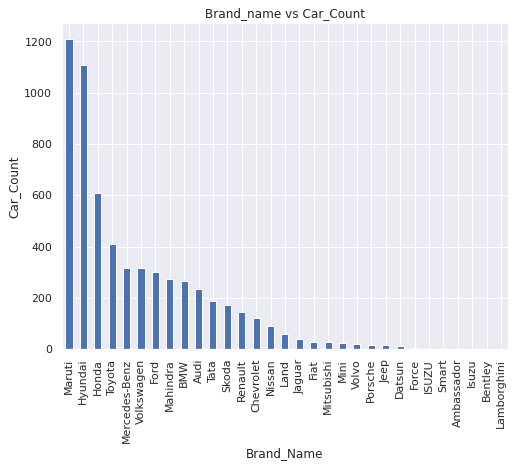

In [835]:
#Brand_name Vs Car count
plt.xlabel("Brand_Name")
plt.ylabel("Car_Count")
plt.title("Brand_name vs Car_Count")
train['Brand_Name'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show>

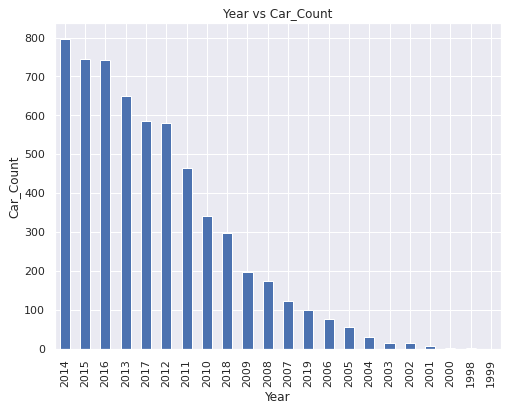

In [836]:
#Year Vs Car count
plt.xlabel("Year")
plt.ylabel("Car_Count")
plt.title("Year vs Car_Count")
train['Year'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show>

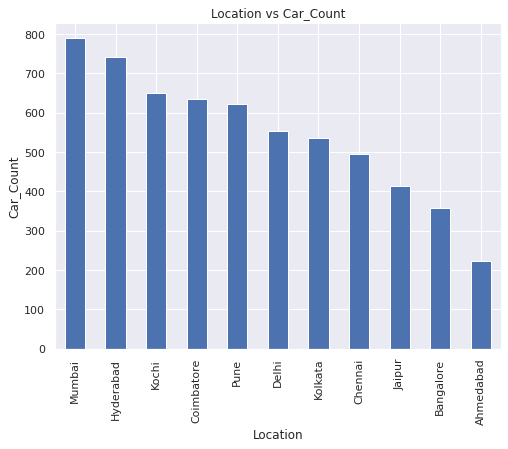

In [837]:
#Location Vs Car count
plt.xlabel("Location")
plt.ylabel("Car_Count")
plt.title("Location vs Car_Count")
train['Location'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show>

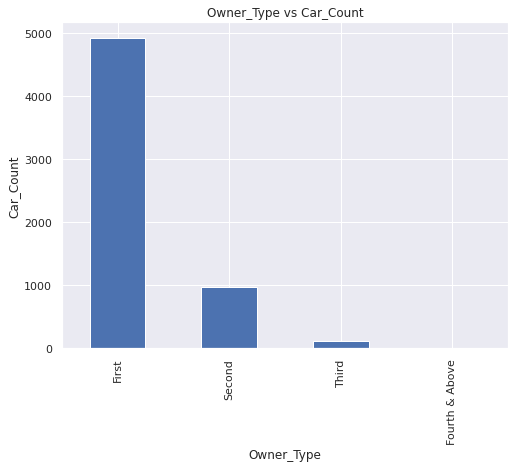

In [838]:
#Owner_Type Vs Car count
plt.xlabel("Owner_Type")
plt.ylabel("Car_Count")
plt.title("Owner_Type vs Car_Count")
train['Owner_Type'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show>

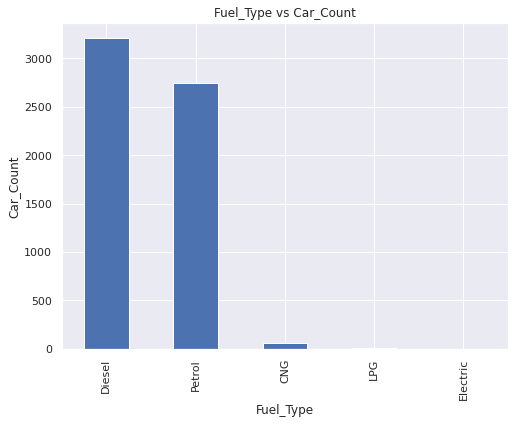

In [839]:
#Fuel_Type Vs Car count
plt.xlabel("Fuel_Type")
plt.ylabel("Car_Count")
plt.title("Fuel_Type vs Car_Count")
train['Fuel_Type'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show>

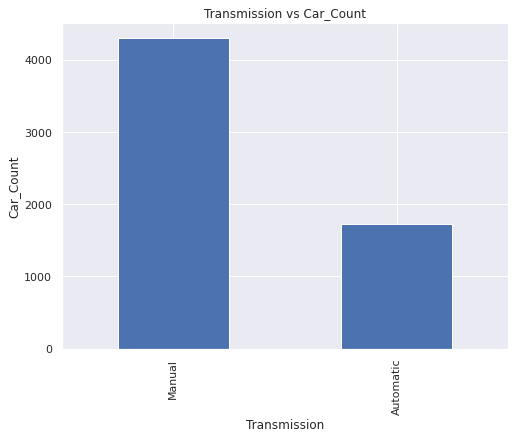

In [840]:
#Transmission Vs Car count
plt.xlabel("Transmission")
plt.ylabel("Car_Count")
plt.title("Transmission vs Car_Count")
train['Transmission'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show>

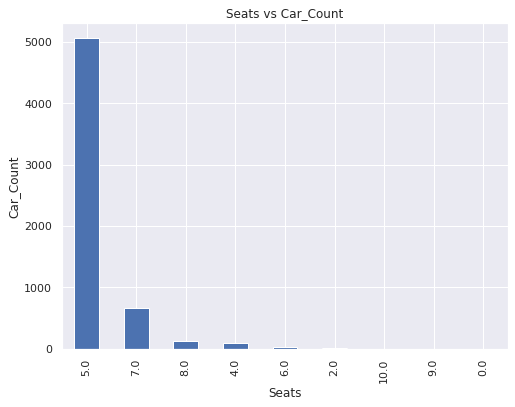

In [841]:
#Seats Vs Car count
plt.xlabel("Seats")
plt.ylabel("Car_Count")
plt.title("Seats vs Car_Count")
train['Seats'].value_counts().plot(kind='bar')
plt.show

Data Visualization


(0.0, 160.0)

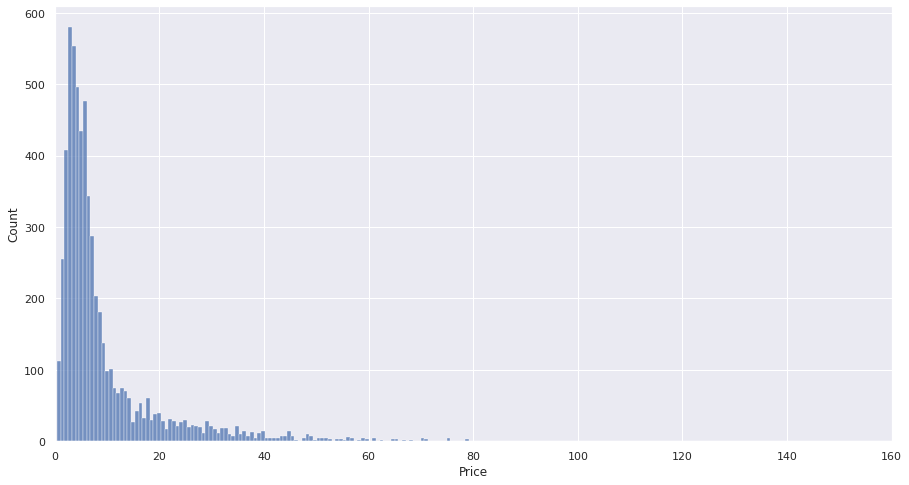

In [842]:
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(train['Price'])
plt.xlim([0,160])

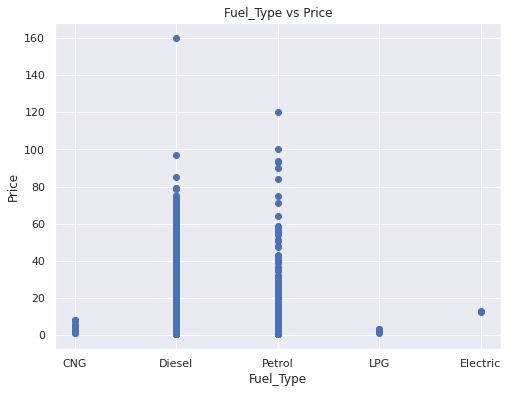

In [843]:
#fuel type vs price
plt.title("Fuel_Type vs Price")
plt.xlabel("Fuel_Type")
plt.ylabel("Price")
plt.scatter(train.Fuel_Type,train.Price)

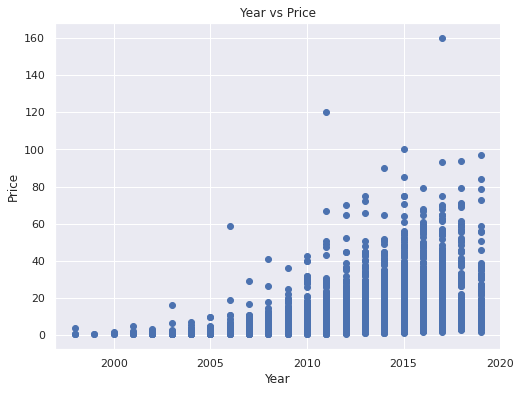

In [844]:
#Year vs price
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.scatter(train.Year,train.Price)

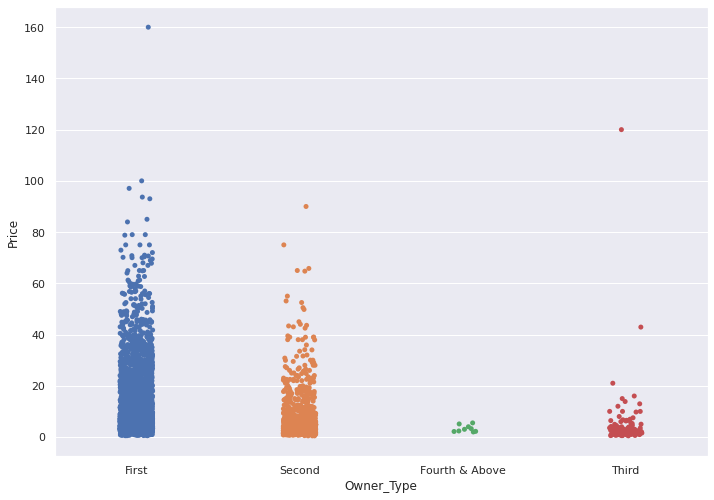

In [845]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = train)

<function matplotlib.pyplot.show>

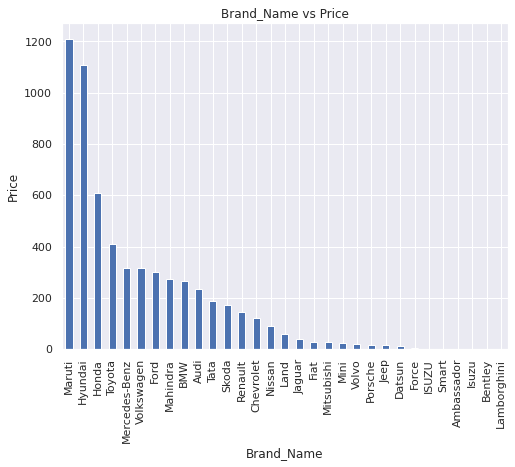

In [846]:
#Brand_Name Vs Car count
plt.xlabel("Brand_Name")
plt.ylabel("Price")
plt.title("Brand_Name vs Price")
train['Brand_Name'].value_counts().plot(kind='bar')
plt.show

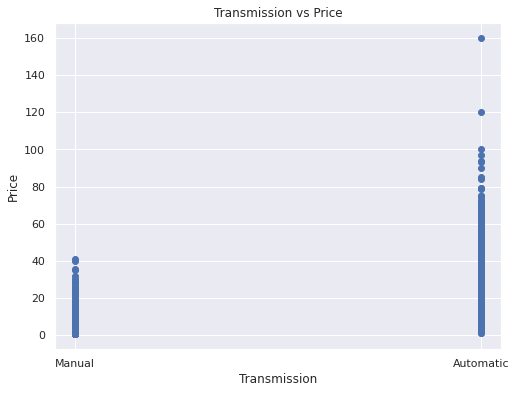

In [847]:
#Transmission vs price
plt.title("Transmission vs Price")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.scatter(train.Transmission,train.Price)

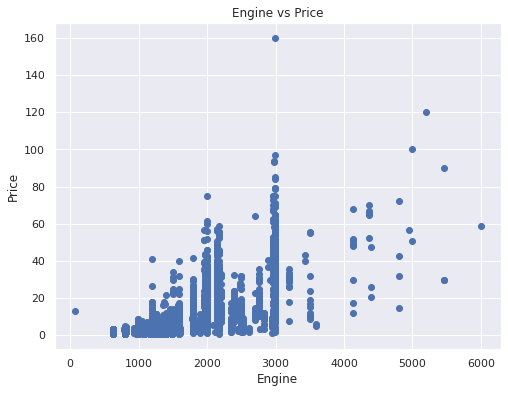

In [848]:
#Engine vs price
plt.title("Engine vs Price")
plt.xlabel("Engine")
plt.ylabel("Price")
plt.scatter(train.Engine, train.Price)

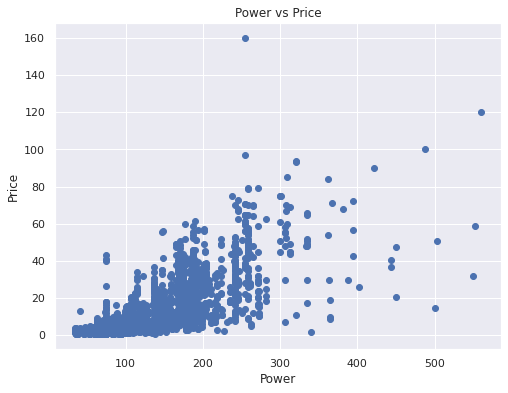

In [849]:
plt.title("Power vs Price")
plt.xlabel("Power")
plt.ylabel("Price")
plt.scatter(train.Power, train.Price)

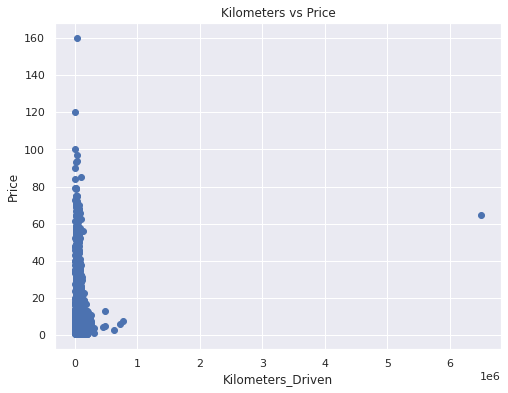

In [850]:
#Kilometers Driven Vs Price
plt.title("Kilometers vs Price")
plt.xlabel("Kilometers_Driven")
plt.ylabel("Price")
plt.scatter(train.Kilometers_Driven, train.Price)

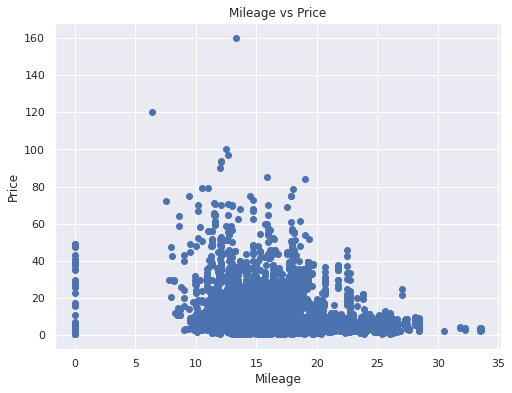

In [851]:
#Mileage Vs Price
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.scatter(train.Mileage, train.Price)

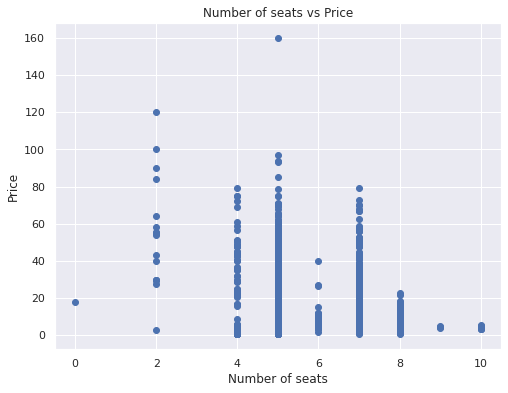

In [852]:
#Number of seats Vs Price
plt.title("Number of seats vs Price")
plt.xlabel("Number of seats")
plt.ylabel("Price")
plt.scatter(train.Seats, train.Price)

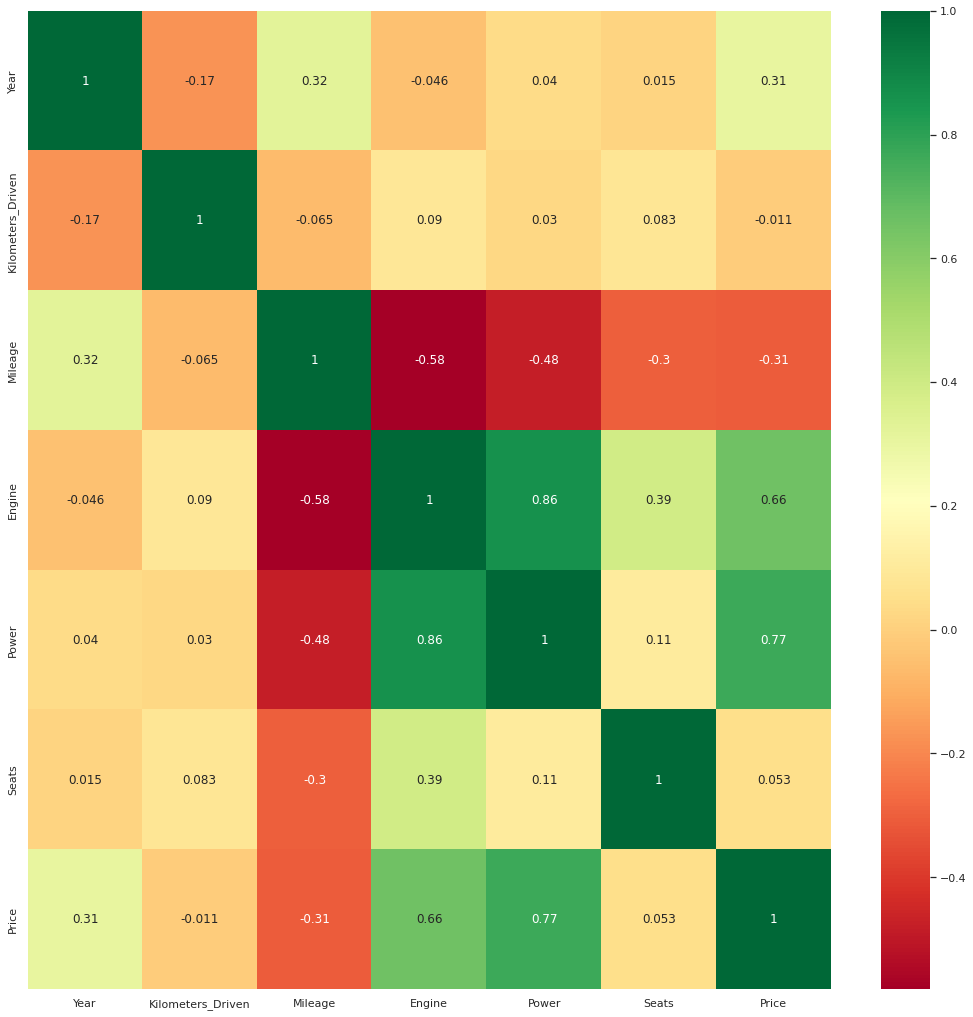

In [853]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn')

plt.show()

# 4. Feature Engineering 

**4.1 Outlier Detection(Power, Engine, Mileage) for train dataset**


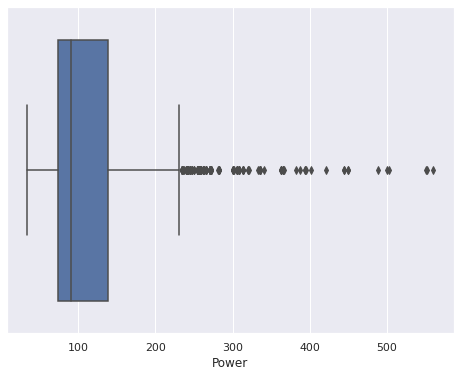

In [854]:
# ploting boxplot to check outliers
#Power
sns.boxplot(x=train['Power'])
plt.show()

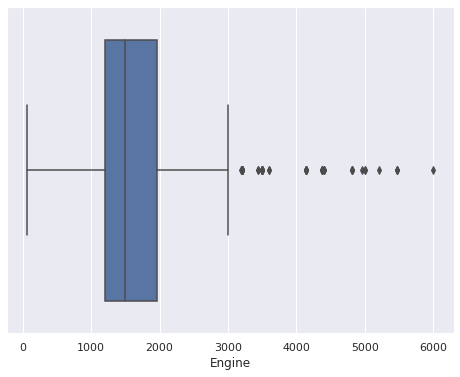

In [855]:
#Engine
sns.boxplot(x=train['Engine'])
plt.show()

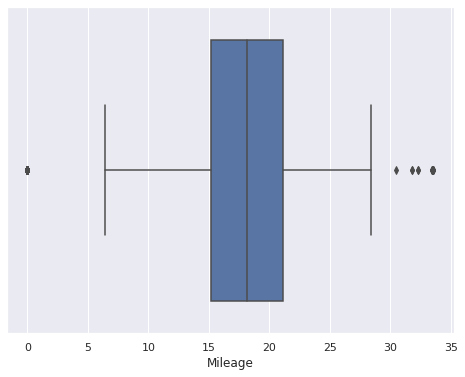

In [856]:
#Mileage
sns.boxplot(x=train['Mileage'])
plt.show()

**4.2 Removing outliers using IQR method**

In [857]:
#As we can see there are outliers in 'Power','Engine', 'Mileage',columns. We will remove these outliers using Inter 
#Quantile Range(IQR) method.
def find_outliers_limit(train,col):
    print(col)
    print('-'*50)
    #removing outliers
    Q1, Q3 = np.percentile(train[col], 25), np.percentile(train[col], 75)
    IQR = Q3 - Q1
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (Q1, Q3, IQR))
    # calculate the outlier cutoff
    # upperlimit = Q3 + (IQR * 1.5)cut_off
    # lowerlimit = Q1 - (IQR * 1.5)cut_off
    cut_off = IQR * 1.5
    lower, upper = Q1 - cut_off, Q3 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper
def remove_outlier(train,col,upper,lower):
  # identify outliers
  outliers = ["x for x in train[col] if x  upper"]
  print('Identified outliers: %d' % len(outliers))
  # remove outliers
  outliers_removed = [x for x in train[col] if x >= lower and x <= upper]
  print('Non-outlier observations: %d' % len(outliers_removed))
  final= np.where(train[col]>upper,upper,np.where(train[col]<lower,lower,train[col]))
  return final
outlier_cols=['Engine','Mileage','Power']
for col in outlier_cols:
  lower,upper=find_outliers_limit(train,col)
  train[col] = remove_outlier(train,col,upper,lower)

Engine
--------------------------------------------------
Percentiles: 25th=1197.000, 75th=1969.000, IQR=772.000
Lower: 39.0  Upper: 3127.0
Identified outliers: 1
Non-outlier observations: 5958
Mileage
--------------------------------------------------
Percentiles: 25th=15.170, 75th=21.100, IQR=5.930
Lower: 6.274999999999997  Upper: 29.995000000000005
Identified outliers: 1
Non-outlier observations: 5937
Power
--------------------------------------------------
Percentiles: 25th=74.000, 75th=138.030, IQR=64.030
Lower: -22.045  Upper: 234.075
Identified outliers: 1
Non-outlier observations: 5781


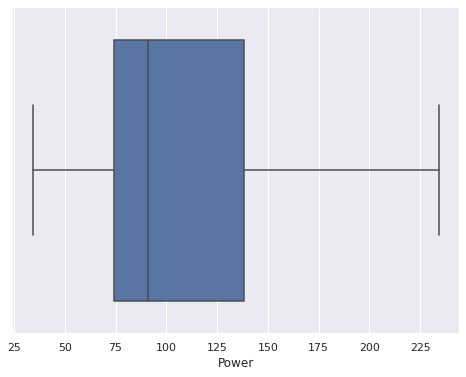

In [858]:
#Power
sns.boxplot(x=train['Power'])
plt.show()

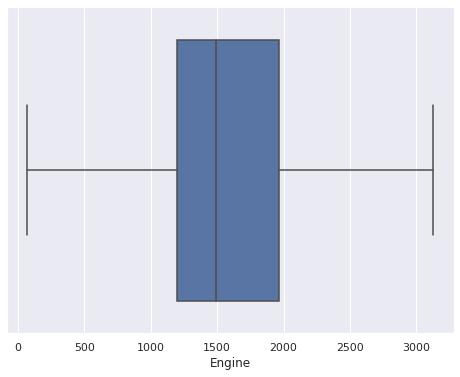

In [859]:
#Engine
sns.boxplot(x=train['Engine'])
plt.show()

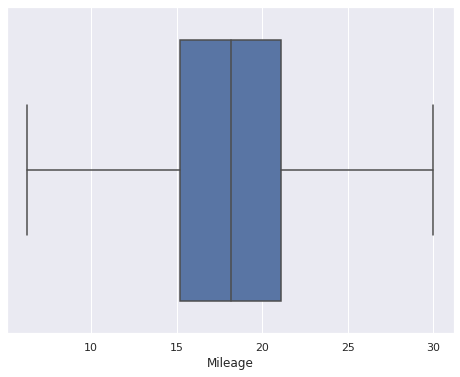

In [860]:
#Mileage
sns.boxplot(x=train['Mileage'])
plt.show()

**4.3 Outlier Detection(Power, Engine, Mileage) for test dataset**

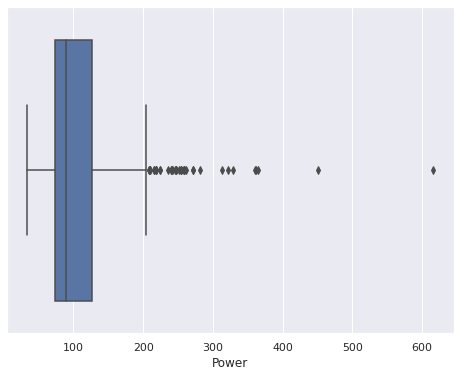

In [861]:
# ploting boxplot to check outliers
#Power
sns.boxplot(x=test['Power'])
plt.show()

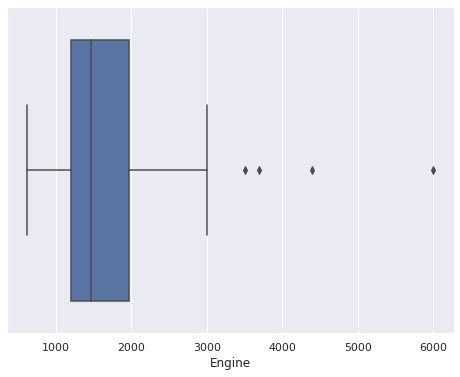

In [862]:
#Engine
sns.boxplot(x=test['Engine'])
plt.show()

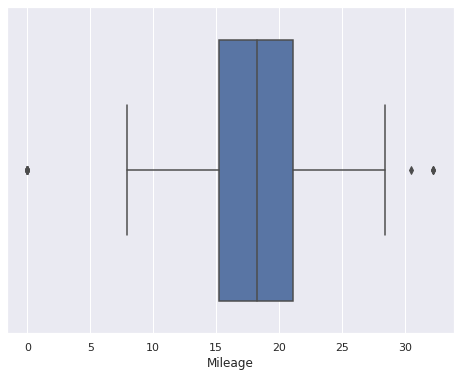

In [863]:
#Mileage
sns.boxplot(x=test['Mileage'])
plt.show()

**4.4 Removing outliers using IQR method**

In [864]:
#As we can see there are outliers in 'Power','Engine', 'Mileage',columns. We will remove these outliers using Inter 
#Quantile Range(IQR) method.
def find_outliers_limit(test,col):
    print(col)
    print('-'*50)
    #removing outliers
    Q1, Q3 = np.percentile(test[col], 25), np.percentile(test[col], 75)
    IQR = Q3 - Q1
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (Q1, Q3, IQR))
    # calculate the outlier cutoff
    # upperlimit = Q3 + (IQR * 1.5)cut_off
    # lowerlimit = Q1 - (IQR * 1.5)cut_off
    cut_off = IQR * 1.5
    lower, upper = Q1 - cut_off, Q3 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper
def remove_outlier(test,col,upper,lower):
  # identify outliers
  outliers = ["x for x in test[col] if x  upper"]
  print('Identified outliers: %d' % len(outliers))
  # remove outliers
  outliers_removed = [x for x in test[col] if x >= lower and x <= upper]
  print('Non-outlier observations: %d' % len(outliers_removed))
  final= np.where(test[col]>upper,upper,np.where(test[col]<lower,lower,test[col]))
  return final
outlier_cols=['Engine','Mileage','Power']
for col in outlier_cols:
  lower,upper=find_outliers_limit(test,col)
  test[col] = remove_outlier(test,col,upper,lower)

Engine
--------------------------------------------------
Percentiles: 25th=1197.250, 75th=1968.000, IQR=770.750
Lower: 41.125  Upper: 3124.125
Identified outliers: 1
Non-outlier observations: 1230
Mileage
--------------------------------------------------
Percentiles: 25th=15.215, 75th=21.100, IQR=5.885
Lower: 6.3874999999999975  Upper: 29.927500000000002
Identified outliers: 1
Non-outlier observations: 1217
Power
--------------------------------------------------
Percentiles: 25th=74.000, 75th=126.300, IQR=52.300
Lower: -4.449999999999989  Upper: 204.75
Identified outliers: 1
Non-outlier observations: 1187


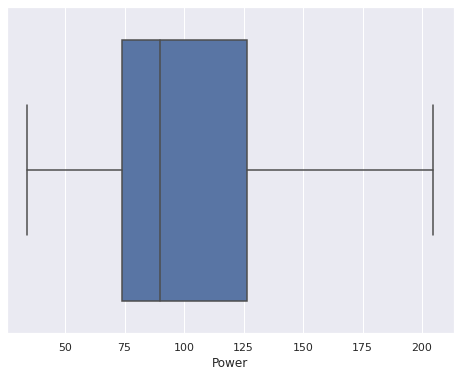

In [865]:
#Power
sns.boxplot(x=test['Power'])
plt.show()

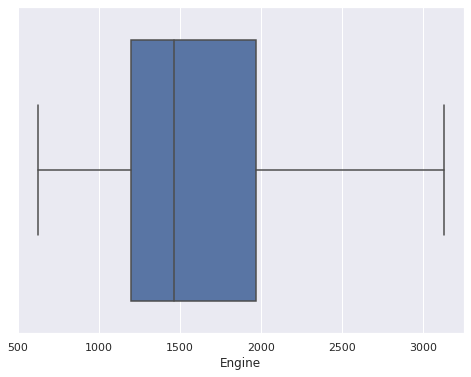

In [866]:
#Engine
sns.boxplot(x=test['Engine'])
plt.show()

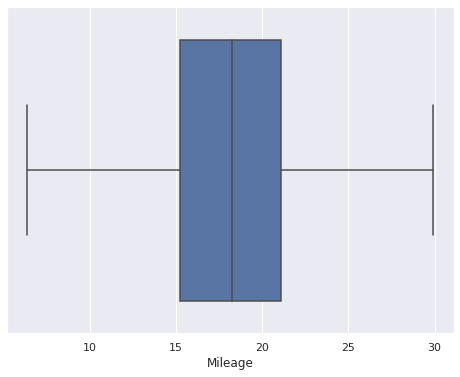

In [867]:
#Mileage
sns.boxplot(x=test['Mileage'])
plt.show()

**Log Transformation for training data**

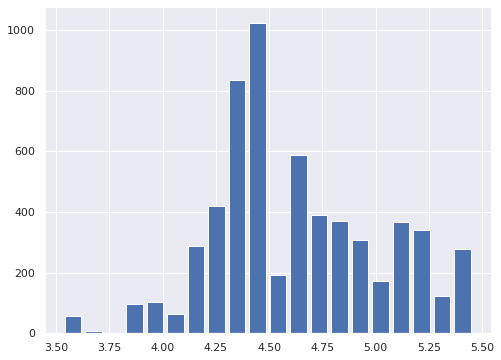

In [868]:
#Applying Log transformation to Power
x = np.log(train['Power'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

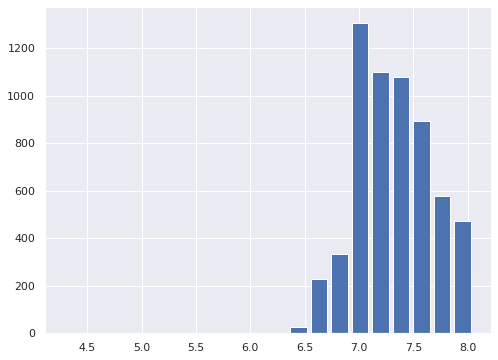

In [869]:
#Applying Log transformation to Engine
x = np.log(train['Engine'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

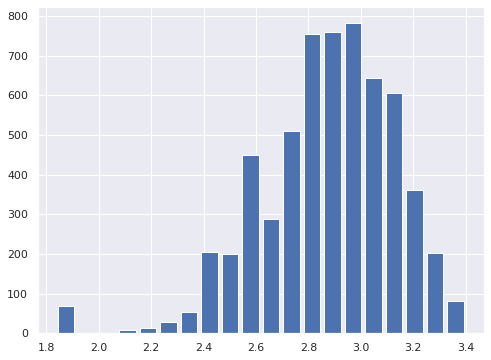

In [870]:
#Applying Log transformation to Mileage
x = np.log(train['Mileage'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

**Log transformation for test data**

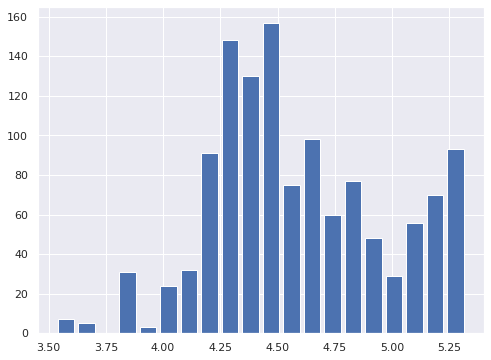

In [871]:
#Applying Log transformation to Power
x = np.log(test['Power'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

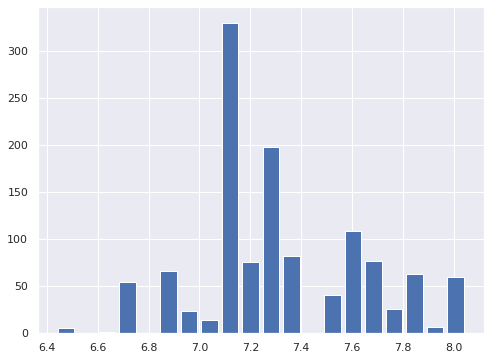

In [872]:
#Applying Log transformation to Engine
x = np.log(test['Engine'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

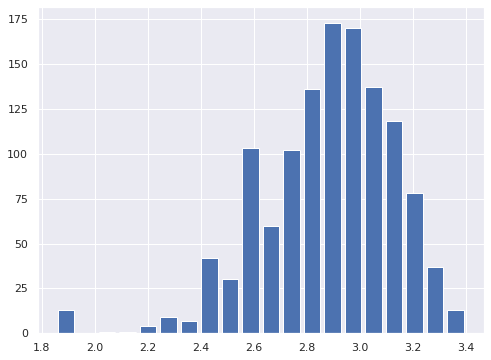

In [873]:
#Applying Log transformation to Mileage
x = np.log(test['Mileage'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

**Feature Scaling using MinMax Scaler for train dataset**

In [874]:
train.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats  Price Brand_Name  
0    26.60   998.0   58.16    5.0   1.75     Maruti  
1    19.67  1582.0  126.20    5.0  12.50    Hyundai  
2    18.20  1199.0   88.70    5.0   4.50      Honda  
3    20.77  1248.0   88.76    7.0   6.00     Maruti  
4    15.20  1968.0  140.80    5.0  17.74       Audi

In [875]:
numeric_columns = ['Year','Kilometers_Driven','Mileage','Engine', 'Power', 'Seats', 'Price']
numericdf = train[numeric_columns]

In [876]:
numericdf.isna().sum()

Year                 0
Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [877]:
#Dataframe before feature scaling
numericdf.head(2) 

Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Price
0  2010              72000    26.60   998.0   58.16    5.0   1.75
1  2015              41000    19.67  1582.0  126.20    5.0  12.50

In [878]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(numericdf)

In [879]:
#dataframe after scaling
transformdf = pd.DataFrame(data=numeric,columns=numeric_columns)
transformdf.head(2)

Year  Kilometers_Driven   Mileage    Engine     Power  Seats     Price
0  0.571429           0.011051  0.856872  0.303110  0.119875    0.5  0.008210
1  0.809524           0.006282  0.564713  0.494272  0.460288    0.5  0.075583

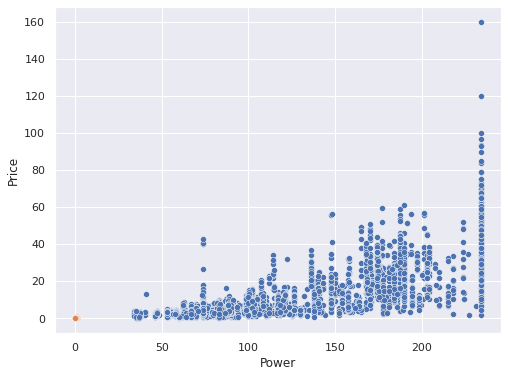

In [880]:
sns.set(rc={'figure.figsize':(8,6)})

sns.scatterplot(data=train,x='Power',y='Price')
sns.scatterplot(data = transformdf,x='Power',y='Price')
plt.show()

**Feature Scaling using MinMax Scaler for test dataset**

In [881]:
test.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0       Delhi  2014              40929       CNG       Manual      First   
1  Coimbatore  2013              54493    Petrol       Manual     Second   
2      Mumbai  2017              34000    Diesel       Manual      First   
3   Hyderabad  2012             139000    Diesel       Manual      First   
4      Mumbai  2014              29000    Petrol       Manual      First   

   Mileage  Engine   Power  Seats Brand_Name  
0  29.9275   998.0   58.20    4.0     Maruti  
1  24.7000   796.0   47.30    5.0     Maruti  
2  13.6800  2393.0  147.80    7.0     Toyota  
3  23.5900  1364.0   74.00    5.0     Toyota  
4  18.5000  1197.0   82.85    5.0    Hyundai

In [882]:
test_numeric_columns = ['Year','Kilometers_Driven','Mileage','Power', 'Seats']
test_numericdf = test[test_numeric_columns]

In [883]:
# Dataframe before scaling
test_numericdf.head(2)

Year  Kilometers_Driven  Mileage  Power  Seats
0  2014              40929  29.9275   58.2    4.0
1  2013              54493  24.7000   47.3    5.0

In [884]:
test_scaler = MinMaxScaler(feature_range=(0, 1))
test_numeric = scaler.fit_transform(test_numericdf)

In [885]:
#dataframe after scaling
test_transformdf = pd.DataFrame(data=test_numeric,columns=test_numeric_columns)
test_transformdf.head(2)

Year  Kilometers_Driven   Mileage     Power  Seats
0  0.782609           0.114410  1.000000  0.140721  0.250
1  0.739130           0.153275  0.777931  0.076810  0.375

In [886]:
## Performing label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [887]:
train['Brand_Name'] = label_encoder.fit_transform(train['Brand_Name'])
train['Location'] = label_encoder.fit_transform(train['Location'])
train['Fuel_Type'] = label_encoder.fit_transform(train['Fuel_Type'])
train['Owner_Type'] = label_encoder.fit_transform(train['Owner_Type'])


train['Brand_Name'] = label_encoder.fit_transform(train['Brand_Name'])
train['Location'] = label_encoder.fit_transform(train['Location'])
train['Fuel_Type'] = label_encoder.fit_transform(train['Fuel_Type'])
train['Transmission'] = label_encoder.fit_transform(train['Transmission'])
train['Owner_Type'] = label_encoder.fit_transform(train['Owner_Type'])

train.head()

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
0         9  2010              72000          0             1           0   
1        10  2015              41000          1             1           0   
2         2  2011              46000          4             1           0   
3         2  2012              87000          1             1           0   
4         3  2013              40670          1             0           2   

   Mileage  Engine   Power  Seats  Price  Brand_Name  
0    26.60   998.0   58.16    5.0   1.75          18  
1    19.67  1582.0  126.20    5.0  12.50          10  
2    18.20  1199.0   88.70    5.0   4.50           9  
3    20.77  1248.0   88.76    7.0   6.00          18  
4    15.20  1968.0  140.80    5.0  17.74           1

# 5. Training Model

In [888]:
y = train.Price
X = train.drop(['Price'],axis=1)

In [889]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

In [890]:
# Creating the model using scikit learn 
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [891]:
LinearRegression()

LinearRegression()

In [892]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_estimators=200)
model1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

# 6. Prediction

In [893]:
y_pred = model.predict(X_valid)
y_pred

array([15.57185669,  7.90943739,  6.31370279, ..., 10.00324181,
        2.02843552, 18.60650009])

In [894]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('R-squared training data: ', model1.score(X_train, y_train))
print('R-squared test data: ', model1.score(X_valid, y_valid))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
print("R2 score : %f" % r2_score(y_valid,y_pred))
print('MSE: ', metrics.mean_squared_error(y_valid, y_pred))

R-squared training data:  0.9818861385803638
R-squared test data:  0.8940225895581867
Mean Absolute Error: 3.8038565207694273
Root Mean Squared Error: 5.981573916472609
R2 score : 0.647882
MSE:  35.779226518225464


In [895]:
y_pred1 = model1.predict(X_valid)
y_pred1

array([22.28465,  7.1691 ,  4.46855, ...,  6.7658 ,  3.6172 ,  9.13485])

In [896]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred1)))
print("R2 score : %f" % r2_score(y_valid,y_pred1))

Mean Absolute Error: 1.467042439141354
Mean Squared Error: 10.768534100669378
Root Mean Squared Error: 3.281544468793525
R2 score : 0.894023


# 7. Evaluating your Model

In [897]:
Y_train_predicted = model.predict(X_train)
Y_test_predicted = model.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_valid,Y_test_predicted))

Train set accuracy:  0.6620479709383662
Test set accuracy :  0.647882456556748


In [898]:
Result = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":Y_test_predicted})
Result.head(100)

Actual Price  Predicted Price
926          40.00        15.571857
1896          7.27         7.909437
4532          3.95         6.313703
102           3.95         0.906135
3388          5.84         8.613349
...            ...              ...
3972          5.10         6.943894
4909          1.35         2.411149
5153         22.00        20.953411
1622          4.75         5.379085
4027         13.49        17.554234

[100 rows x 2 columns]

In [899]:
Y_train_predicted1 = model1.predict(X_train)
Y_test_predicted1 = model1.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted1))
print("Test set accuracy : ",r2_score(y_valid,Y_test_predicted1))

Train set accuracy:  0.9818861385803638
Test set accuracy :  0.8940225895581867


In [900]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred1)))
print("R2 score : %f" % r2_score(y_valid,y_pred1))

Mean Absolute Error: 1.467042439141354
Mean Squared Error: 10.768534100669378
Root Mean Squared Error: 3.281544468793525
R2 score : 0.894023


In [901]:
Result1 = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":Y_test_predicted1})
Result1.head(100)

Actual Price  Predicted Price
926          40.00         22.28465
1896          7.27          7.16910
4532          3.95          4.46855
102           3.95          4.12645
3388          5.84          6.54435
...            ...              ...
3972          5.10          3.84370
4909          1.35          1.86490
5153         22.00         17.55185
1622          4.75          5.38195
4027         13.49         13.13105

[100 rows x 2 columns]

# SUBMISSION DATE: 2nd April 2022